# TFM - MVP - CCC PALOS 1

In this Notebook unit PALOS 1 will be explored, ploted, and first MVP will be created.

First of all, a function to plot an hourly bid curve for a specific day will be created.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#df will be all data for unit PALOS1 from november 2019 to october 2020. 
#This data was previously created from OMIE web page

df = pd.read_csv('/home/dsc/Documents/TFM/Data/OMIE/OMIE_PALOS1/OMIE_PALOS1.csv',index_col=0)

In [2]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,1,12,180.30,394.1
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,2,12,180.30,394.1
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,3,1,1.13,50.0
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,3,12,180.30,344.1
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.1,2020,1,1,4,1,1.13,60.0


In [3]:
df.shape

(71112, 13)

In [4]:
df.tail()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
71107,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,8,43.22,17.0
71108,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,9,44.26,17.0
71109,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,10,45.31,17.0
71110,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,11,46.35,17.0
71111,6126741,2,PALOS1,C.C. PALOS 1,VNO,394.1,2019,12,31,24,12,180.30,34.1


In [5]:
len(df)

71112

In [6]:
df.columns

Index(['Bid_Code', 'Num_Version', 'Bid_Unit', 'Unit_Description', 'Sell_Buy',
       'Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy'],
      dtype='object')

In [7]:
#pd.reset_option('precision')
pd.options.display.float_format = '{:,.2f}'.format

In [8]:
df.describe()

,Bid_Code,Num_Version,Pot_max,Year,Month,Day,Period,Block,Price,Energy
count,"71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00","71,112.00"
mean,"6,303,430.78",1.78,394.10,"2,019.86",6.36,15.93,15.88,6.52,52.56,47.00
std,"143,155.02",0.87,0.00,0.35,3.43,8.90,5.27,3.64,48.74,75.62
min,"6,049,903.00",1.00,394.10,"2,019.00",1.00,1.00,1.00,1.00,1.13,3.00
25%,"6,176,254.00",1.00,394.10,"2,020.00",3.00,8.00,12.00,3.00,35.40,17.00
50%,"6,300,456.00",2.00,394.10,"2,020.00",6.00,16.00,16.00,6.00,40.72,17.00
75%,"6,427,697.00",2.00,394.10,"2,020.00",9.00,24.00,20.00,10.00,45.42,17.00
max,"6,555,573.00",5.00,394.10,"2,020.00",12.00,31.00,25.00,12.00,180.30,394.10


In [9]:
#Searching for NaN

if df.shape[0] == df.dropna().shape[0]:
    print('No NaN in df')

No NaN in df


In [10]:
df.dtypes

Bid_Code              int64
Num_Version           int64
Bid_Unit             object
Unit_Description     object
Sell_Buy             object
Pot_max             float64
Year                  int64
Month                 int64
Day                   int64
Period                int64
Block                 int64
Price               float64
Energy              float64
dtype: object

In [11]:
#Picking only the information that will be needed for ploting the bid curve.

df_curve = df[['Pot_max', 'Year', 'Month', 'Day', 'Period', 'Block', 'Price',
       'Energy']]

In [12]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,394.10,2020,1,1,1,12,180.30,394.10
1,394.10,2020,1,1,2,12,180.30,394.10
2,394.10,2020,1,1,3,1,1.13,50.00
3,394.10,2020,1,1,3,12,180.30,344.10
4,394.10,2020,1,1,4,1,1.13,60.00


In [13]:
#Including the week day per each day.

import datetime as dt

df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])

<ipython-input-13-749467c0d990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Date']= pd.to_datetime(df_curve[['Year', 'Month', 'Day']])


In [14]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01


In [15]:
df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


<ipython-input-15-89fa5e36ee21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Date'].apply(lambda x: x.weekday())


In [16]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,2
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,2
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,2
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,2
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,2


In [17]:
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])

<ipython-input-17-ad44a60512b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Weekday'] = df_curve['Weekday'].apply(lambda x: weekDays[x])


In [18]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday


In [19]:
df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]

df_curve_example

<ipython-input-19-c3d08d331028>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday
61033,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday
61034,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday
61035,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday
61036,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday
61037,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday
61038,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday
61039,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday
61040,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday
61041,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday
61042,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday


In [20]:
df_curve_example['Energy'].cumsum()

61033   190.00
61034   207.00
61035   224.00
61036   241.00
61037   258.00
61038   275.00
61039   292.00
61040   309.00
61041   326.00
61042   343.00
61043   360.00
61044   394.10
Name: Energy, dtype: float64

In [21]:
df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()

<ipython-input-21-3bb43226947c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curve['Energy_tot'] = df_curve.groupby(['Date','Period'])['Energy'].cumsum()


In [22]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


In [23]:
df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') & 
                                                (df_curve['Period']==24)]


df_curve_example2.reset_index(drop=True,inplace=True)

<ipython-input-23-1704094d25ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve_example2 = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-31') &


In [24]:
df_curve_example2

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,10,31,24,1,1.13,190.00,2020-10-31,Saturday,190.00
1,394.10,2020,10,31,24,2,34.89,17.00,2020-10-31,Saturday,207.00
2,394.10,2020,10,31,24,3,35.64,17.00,2020-10-31,Saturday,224.00
3,394.10,2020,10,31,24,4,36.40,17.00,2020-10-31,Saturday,241.00
4,394.10,2020,10,31,24,5,37.15,17.00,2020-10-31,Saturday,258.00
5,394.10,2020,10,31,24,6,38.71,17.00,2020-10-31,Saturday,275.00
6,394.10,2020,10,31,24,7,39.46,17.00,2020-10-31,Saturday,292.00
7,394.10,2020,10,31,24,8,40.22,17.00,2020-10-31,Saturday,309.00
8,394.10,2020,10,31,24,9,41.47,17.00,2020-10-31,Saturday,326.00
9,394.10,2020,10,31,24,10,42.73,17.00,2020-10-31,Saturday,343.00


In [25]:
#Example to create the plot function
#This part of the code will be deleted

df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') & 
                                                (df_curve['Period']==24)]

<ipython-input-25-a0db271286b4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-10-22') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
59230,394.10,2020,10,22,24,1,1.13,190.00,2020-10-22,Thursday,190.00
59231,394.10,2020,10,22,24,2,35.34,17.00,2020-10-22,Thursday,207.00
59232,394.10,2020,10,22,24,3,36.11,17.00,2020-10-22,Thursday,224.00
59233,394.10,2020,10,22,24,4,36.87,17.00,2020-10-22,Thursday,241.00
59234,394.10,2020,10,22,24,5,37.64,17.00,2020-10-22,Thursday,258.00
59235,394.10,2020,10,22,24,6,39.20,17.00,2020-10-22,Thursday,275.00
59236,394.10,2020,10,22,24,7,39.97,17.00,2020-10-22,Thursday,292.00
59237,394.10,2020,10,22,24,8,40.74,17.00,2020-10-22,Thursday,309.00
59238,394.10,2020,10,22,24,9,42.00,17.00,2020-10-22,Thursday,326.00
59239,394.10,2020,10,22,24,10,43.27,17.00,2020-10-22,Thursday,343.00


In [26]:
xs = np.linspace(0,len(df_curve_example2),len(df_curve_example2))

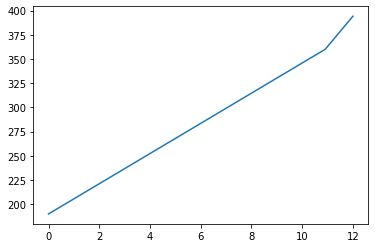

In [27]:
plt.plot(xs, df_curve_example2['Energy_tot'])

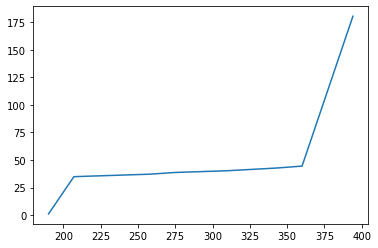

In [28]:
plt.plot(df_curve_example2['Energy_tot'],df_curve_example2['Price'])

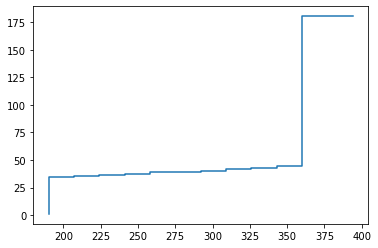

In [29]:
plt.step(df_curve_example2['Energy_tot'],df_curve_example2['Price'], label='pre (default)')

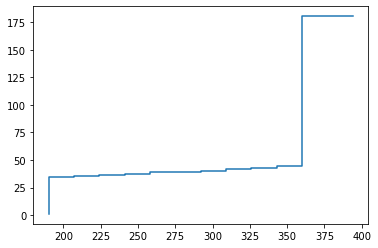

In [30]:
plt.plot(df_curve_example2['Energy_tot'],
         df_curve_example2['Price'], 
         drawstyle='steps', label='steps (=steps-pre)')

In [31]:
#Function to plot bid curves for a chosen date and period (hour)

def plot_bid_curve(date, period):
    df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) & 
                                                (df_curve['Period'] == period)]
   
    return plt.plot(df_plot['Energy_tot'], df_plot['Price'], drawstyle='steps', label='steps (=steps-pre)')

#The first step should be included

<ipython-input-31-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


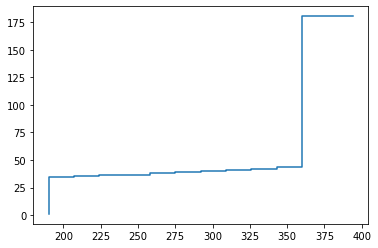

In [32]:
plot_bid_curve('2020-8-25',18)

In [33]:
#It seems that energy blocks are equal for the hole year.

## CREATING A MVP CONSIDERING ONLY PRICE AS TARGET

### CREATING THE DATASET TO USE THE MODELS

First of all, a dataframe for using different kind of models are created.

The first choice is to use only Month, Day, Period, Block, Energy, Price. As Energy seems to be almost equal all the time, the first models will use Energy as feature. Future models will use Energy also as target.

In [34]:
df.head()

,Bid_Code,Num_Version,Bid_Unit,Unit_Description,Sell_Buy,Pot_max,Year,Month,Day,Period,Block,Price,Energy
0,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,1,12,180.30,394.10
1,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,2,12,180.30,394.10
2,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,1,1.13,50.00
3,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,3,12,180.30,344.10
4,6128191,2,PALOS1,C.C. PALOS 1,VNO,394.10,2020,1,1,4,1,1.13,60.00


In [35]:
df_curve.head()

,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
0,394.10,2020,1,1,1,12,180.30,394.10,2020-01-01,Wednesday,394.10
1,394.10,2020,1,1,2,12,180.30,394.10,2020-01-01,Wednesday,394.10
2,394.10,2020,1,1,3,1,1.13,50.00,2020-01-01,Wednesday,50.00
3,394.10,2020,1,1,3,12,180.30,344.10,2020-01-01,Wednesday,394.10
4,394.10,2020,1,1,4,1,1.13,60.00,2020-01-01,Wednesday,60.00


### FIRST MODEL

The first set of models will be created considering "One Hot Encoding" for categorical variables dropping the first variable and Standirizing by the maximum the remaining variable.

The second set of models will be built without dropping the first variable in One Hot Encoding

In [36]:
#Most of the variables are categorical:Month, Day, Period, Weekday and Block.
#Only Energy_tot is not categorical.
#One-hot encoding will be used to convert variables from categorical to binary.

from sklearn.preprocessing import OneHotEncoder

df_curve_cat = df_curve[['Month','Day','Period','Weekday','Block']]

In [ ]:
one_encoder = OneHotEncoder(drop='first', sparse=False)

df_curve_cat_onehot = one_encoder.fit_transform(df_curve_cat)

In [37]:
df_curve_cat_onehot.shape

(71112, 82)

In [38]:
df_curve_cat_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [39]:
type(df_curve['Energy_tot'].max())

float

In [40]:
from numpy import asarray

df_curve_energy = np.asarray(df_curve[['Energy_tot']]/df_curve['Energy_tot'].max())
df_curve_energy

array([[1.        ],
       [1.        ],
       [0.12687135],
       ...,
       [0.87033748],
       [0.91347374],
       [1.        ]])

In [41]:
df_curve_cat_onehot.shape, df_curve_energy.shape

((71112, 82), (71112, 1))

In [42]:
df_curve_energy.shape

(71112, 1)

In [43]:
X = np.concatenate((df_curve_cat_onehot, df_curve_energy), axis=1)

In [44]:
X.shape

(71112, 83)

In [45]:
y = np.asarray(df_curve['Price'])

In [46]:
y.shape

(71112,)

In [47]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [48]:
#Splitting Test set and Train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [49]:
## LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

#Creation of a model instance 
reg_linear = LinearRegression()

reg_linear.fit(X_train,y_train)


LinearRegression()

In [50]:
y_pred_linear = reg_linear.predict(X_test)

In [51]:
reg_linear.coef_

array([-1.58315803e+00, -1.05524821e+00,  2.94716938e-01, -1.04991313e+01,
       -7.32380441e+00, -2.39150650e+00, -3.56178512e+00, -3.36477202e+00,
       -2.60393243e+00,  2.71823801e-01,  1.33145904e+00, -3.51718819e-01,
       -2.91323018e-01, -3.24162601e-01, -2.66838935e-01, -2.21143472e-01,
       -2.15613554e-01, -7.25370167e-02,  5.75913901e-02,  1.20421240e-01,
        9.08578248e-02,  8.98412136e-03,  2.21773726e-02,  4.51075468e-02,
       -4.22313443e-02, -2.58758431e-02,  1.07736290e-01,  7.23316586e-02,
        6.71255306e-01,  8.83353056e-01,  1.99867462e+00,  1.73959808e+00,
        1.43397176e+00,  1.70628699e+00,  1.77200225e+00,  1.82509421e+00,
        1.73382975e+00,  1.49927671e+00,  1.59617814e+00,  1.52955651e+00,
        6.40024466e-01, -4.63231305e-03, -6.33821325e-01,  2.34759129e-01,
        2.36938206e-01,  1.62007041e-01,  1.98040807e-01,  2.19464856e-01,
       -1.83181452e-02, -2.39887732e-01, -2.30371267e-01, -2.64825963e-01,
       -2.01616336e-01, -

In [52]:
#MAE metric
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred_linear) # Primero valor real y luego prediccion

2.00147799811261

In [53]:
## K-NEIGHBORS REGRESSION

from sklearn.neighbors import KNeighborsRegressor

In [54]:
reg_kneig = KNeighborsRegressor(n_neighbors=10)

reg_kneig.fit(X_train,y_train)



KNeighborsRegressor(n_neighbors=10)

In [57]:
y_pred_kneig = reg_kneig.predict(X_test)


In [58]:
# MAE
mean_absolute_error(y_test,y_pred_kneig)

7.574500246080295

In [59]:
# RMSE from linear regression

from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_linear))

2.9134927902093426

In [60]:
# RMSE: k Nei
np.sqrt(mean_squared_error(y_test,y_pred_kneig))

13.509082581736216

In [64]:


## X-validation for linear regression

from sklearn.model_selection import cross_val_score

#X-val for LINEAR REGRESSION
#cv=5 (by default)

cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error")

array([-3.20135290e+10, -7.66981383e+11, -1.55426899e+12, -4.89339687e+12,
       -2.55815071e+12])

In [65]:
#NO ENTIENDO QUÉ ESTÁ PASANDO AQUÍ... ¿CÓMO ES POSIBLE QUE PRIMERO SALGA DEL ORDEN DE 2 Y LUEGO DEL ORDEN DE 2e12?

In [62]:
cross_val_score(reg_linear,X,y,scoring="neg_mean_absolute_error").mean()

-1960962294429.448

In [67]:
#X-val for K-NEIGHBORS
cross_val_score(reg_kneig,X,y,scoring="neg_mean_absolute_error")

array([-10.7961674 ,  -6.55810722,  -6.77433701,  -2.17258733,
        -4.84841886])

In [ ]:
#Examples of real and predition curves will be ploted to compare them.

<ipython-input-31-ece397bd5943>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date'] == date) &


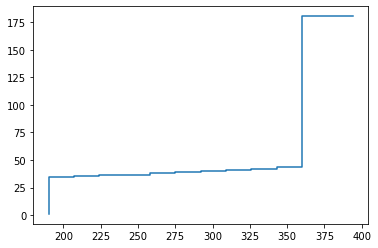

In [78]:
plot_bid_curve('2020-8-16',18)

In [80]:
example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-08-16') & 
                                                (df_curve['Period']==18)]
example

<ipython-input-80-38a5e932a7bf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  example = df_curve.sort_values(['Date','Period','Block'])[(df_curve['Date']=='2020-08-16') &


,Pot_max,Year,Month,Day,Period,Block,Price,Energy,Date,Weekday,Energy_tot
45825,394.10,2020,8,16,18,1,1.13,190.00,2020-08-16,Sunday,190.00
45826,394.10,2020,8,16,18,2,34.48,17.00,2020-08-16,Sunday,207.00
45827,394.10,2020,8,16,18,3,35.22,17.00,2020-08-16,Sunday,224.00
45828,394.10,2020,8,16,18,4,35.97,17.00,2020-08-16,Sunday,241.00
45829,394.10,2020,8,16,18,5,36.72,17.00,2020-08-16,Sunday,258.00
45830,394.10,2020,8,16,18,6,38.26,17.00,2020-08-16,Sunday,275.00
45831,394.10,2020,8,16,18,7,39.01,17.00,2020-08-16,Sunday,292.00
45832,394.10,2020,8,16,18,8,39.76,17.00,2020-08-16,Sunday,309.00
45833,394.10,2020,8,16,18,9,41.00,17.00,2020-08-16,Sunday,326.00
45834,394.10,2020,8,16,18,10,42.25,17.00,2020-08-16,Sunday,343.00


In [81]:
example_cat = example[['Month','Day','Period','Weekday','Block']]
example_cat

,Month,Day,Period,Weekday,Block
45825,8,16,18,Sunday,1
45826,8,16,18,Sunday,2
45827,8,16,18,Sunday,3
45828,8,16,18,Sunday,4
45829,8,16,18,Sunday,5
45830,8,16,18,Sunday,6
45831,8,16,18,Sunday,7
45832,8,16,18,Sunday,8
45833,8,16,18,Sunday,9
45834,8,16,18,Sunday,10


In [82]:
### MUCHO OJO!!!!!!
### ESTO NO ESTÁ BIEN!!! SI LO QUE QUEREMOS ES PREDECIR UNA SOLA CURVA HAY QUE VER CÓMO TRANSFORMAR LA X
### PARA ADECUARLO AL MODELO QUE SE HA AJUSTADO CON UN X y DE DIMENSIONES DIFERENTES!!!


example_cat_onehot = one_encoder.transform(example_cat)
example_cat_onehot.shape

(12, 11)

In [83]:
example_cat_onehot

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])